# Analyzing, and Visualizing Data WeRateDogs


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [17]:
# Change the style of the plots
matplotlib.style.use('ggplot')

In [18]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null float64
tweet_retweets             1994 non-null float64
dog_stage                  306 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null object
dog_name                   1369 non-null object
dog_gender                 862 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 233.8+ KB


### Plot the correlation map to see the relationship between our variables

Text(0.5, 1.0, 'Correlation Map')

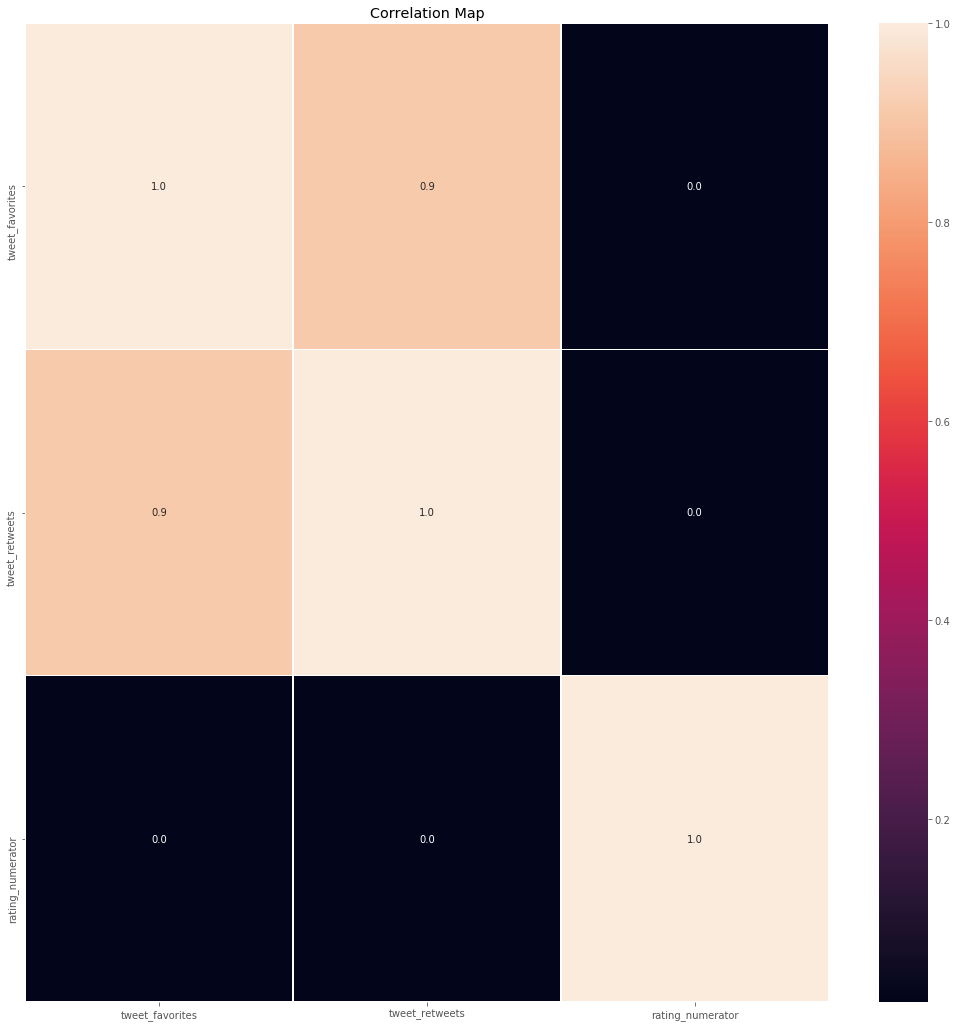

In [19]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets','rating_numerator',
                      'dogs_count']].corr(), annot=True,
                       linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we can observe from the above map is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets).
- Rating don't get affected with any other variable.

#### Relation between tweet_favorites and tweet_retweet

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

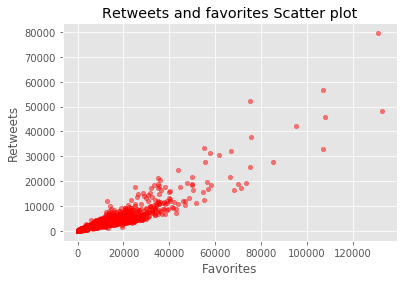

In [21]:
df_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

> As the correlation map shows if the count of retweet is high the count of favorites go high

### Famous Breeds

In [22]:
df_master = pd.read_csv('twitter_archive_master.csv')
# changing name of prediction_algorithm column with dog_breed
df_master.rename(columns = {"prediction_algorithm": "dog_breed"}, inplace = True) 

Text(0, 0.5, 'dog_breed')

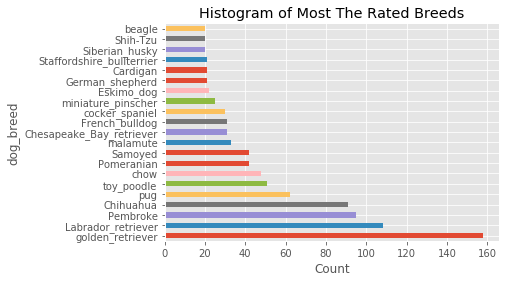

In [23]:
# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

> Top two famous breeds are : Golden_retriver and Labrador_retriver according to a meural network that can classify breeds of dogs

### Famous dog gender

Text(0.5, 1.0, 'Dog Gender Partitions')

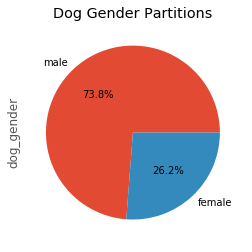

In [24]:
# Plot the data partitioned by dog gender
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')

> According to our treatment (getting the gender from the text of the tweet) we find that the male dogs more than female dogs in our dataset.

### Famous dog Stages

(-1.288796714460721,
 1.2361089165733263,
 -1.231121053836121,
 1.2105313934916164)

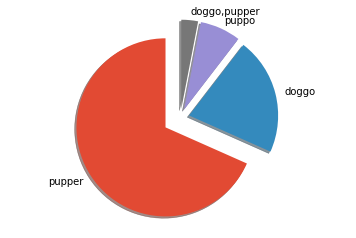

In [25]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

> Puppers represent the biggest area in our pie.

Text(0.5, 1.0, '')

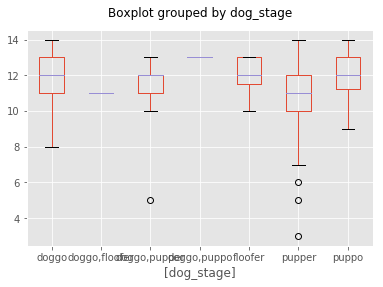

In [30]:
# Plot the dog stages with ratings
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

In [31]:
#df_master[df_master['dog_stage'] == None].groupby('dog_stage')['rating_numerator'].describe()
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo            11.888889
doggo,floofer    11.000000
doggo,pupper     11.000000
doggo,puppo      13.000000
floofer          12.000000
pupper           10.629409
puppo            12.000000
Name: rating_numerator, dtype: float64

> Puppers represent the biggest number of our pie, but it has the lowest mean rating

## Conclusion

The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".

If I thinking about adopting a dog, I will get a pupper and I will take pictures, and share it in @dog_rates and get a comments in my picture and get rating of my dog.